In [1]:
from keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Text(0.5, 1.0, '5')

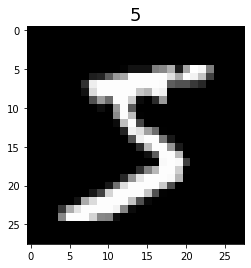

In [7]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap = 'gray')
plt.title(train_labels[0], fontsize = 18)

In [10]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28, )))
network.add(layers.Dense(10, activation = 'softmax'))

In [13]:
network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [25]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [31]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [33]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 12s 4ms/step - loss: 0.4207 - accuracy: 0.8792
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1119 - accuracy: 0.9680
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0714 - accuracy: 0.9781
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0488 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0354 - accuracy: 0.9895


In [34]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(f'test_acc: {test_acc}')

313/313 [==============================] - 1s 1ms/step - loss: 0.0701 - accuracy: 0.9792
test_acc: 0.979200005531311


## 2.2 Data representations for neural networks

In [37]:
import numpy as np

np.array([[1,2], [2,3]]).ndim

2

In [39]:
np.array([[[1,2], [2,3]]]).ndim

3

In [40]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [47]:
print(f'Axes: {train_images.ndim},\nShape: {train_images.shape},\nData type: {train_images.dtype}')

Axes: 3,
Shape: (60000, 28, 28),
Data type: uint8


Text(0.5, 1.0, '9')

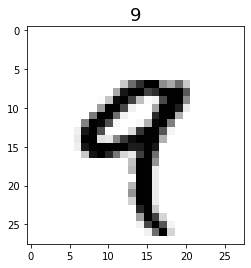

In [58]:
import matplotlib.pyplot as plt

plt.imshow(train_images[4], cmap = plt.cm.binary)
plt.title(train_labels[4], fontsize = 18)

In [67]:
# Element-wise operations
def naive_relu(x):
    assert len(x.shape) == 2
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
            
    return x

def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
            
    return x

In [79]:
from random import randint

x = np.ones((100, 100))
y = np.ones((100, 100))

In [81]:
%timeit naive_relu(x)

6.75 ms ± 147 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [82]:
%timeit naive_add(x, y)

5.5 ms ± 84.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [86]:
%time
z = x + y
z = np.maximum(z, 0.)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.72 µs


In [91]:
# Broadcasting
def naive_add_matrix_and_vector(x, y):
    #assert len(x.shape) == 2
    #assert len(y.shape) == 1
    #assert x.shape[1] == y.shape[0]
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [94]:
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))

z = np.maximum(x, y)

In [92]:
%timeit naive_add_matrix_and_vector(x, y)

461 µs ± 7.06 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [95]:
%timeit np.maximum(x, y)

95.8 µs ± 4.88 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [100]:
# Tensor dot
x = np.random.random((32))
y = np.random.random((32))

z = np.dot(x, y)
z

7.669053232414849

In [105]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
        
    return z

def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
        
    return z

def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros(x.shape[0], y.shape[1])
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
        
    return z

In [114]:
# Tensor reshaping
"""
Reshaping a tensor means rearranging its rows and columns to
match a target shape. Naturally, the reshaped tensor has the same total
number of coefficients as the initial tensor.
"""

x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
print(x.shape)

(3, 2)


In [111]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [113]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [117]:
x = np.zeros((300, 20))
x = np.transpose(x)
print(x.shape)

(20, 300)


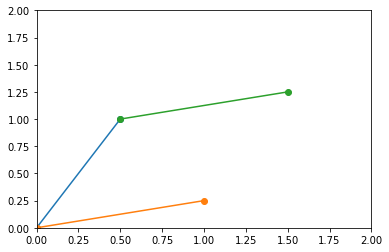

In [164]:
# Geometric interpretation of tensor operations
A = [0.5, 1]
B = [1, 0.25]
C = np.add(A, B)

plt.xlim(0, 2), plt.ylim(0, 2)
plt.plot([0, A[0]], [0, A[1]], marker='o')
plt.plot([0, B[0]], [0, B[1]], marker='o')
plt.plot([A[0], C[0]], [A[1], C[1]], marker='o')

plt.show()